In [1]:

# 📦 Imports & data load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('movies.csv')
print(f"Data shape: {df.shape}")
df.head()


Data shape: (7668, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:

# 🔍 Missing‑value check
for col in df.columns:
    pct_missing = df[col].isna().mean() * 100
    if pct_missing > 0:
        print(f"{col:20} – {pct_missing:5.1f}% missing")


rating               –   1.0% missing
released             –   0.0% missing
score                –   0.0% missing
votes                –   0.0% missing
writer               –   0.0% missing
star                 –   0.0% missing
country              –   0.0% missing
budget               –  28.3% missing
gross                –   2.5% missing
company              –   0.2% missing
runtime              –   0.1% missing


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

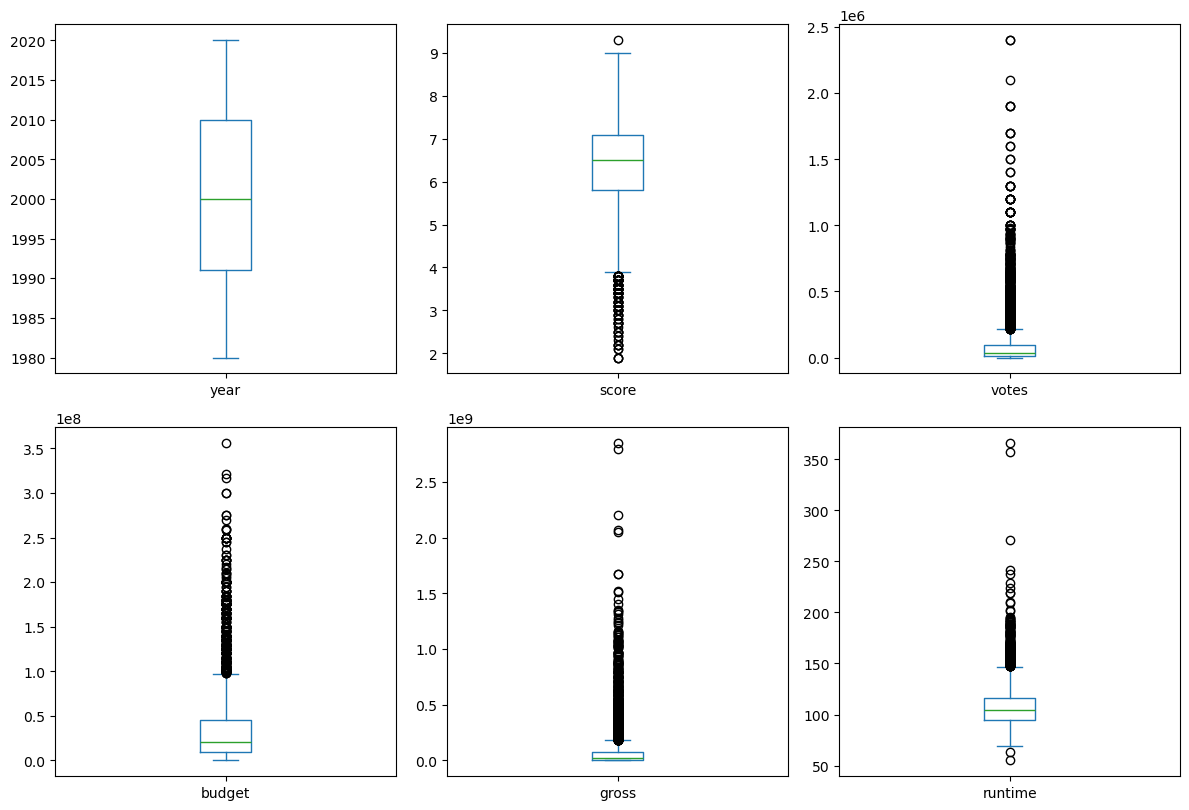

In [7]:

# 📊 Box‑plots for numeric columns (outlier scan)
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].plot(kind='box', subplots=True, layout=(len(numeric_cols)//3+1,3),
                      figsize=(12, 4 * (len(numeric_cols)//3+1)), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [9]:
df = df.drop_duplicates(); df.shape

(7668, 15)

In [11]:

# 🔗 Correlation (numeric only)
print('Pearson correlation') 
display(df.select_dtypes('number').corr(method='pearson').round(2))

print('\nKendall correlation')
display(df.select_dtypes('number').corr(method='kendall').round(2))

print('\nSpearman correlation')
display(df.select_dtypes('number').corr(method='spearman').round(2))


Pearson correlation


,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.22,0.33,0.26,0.12
score,0.10,1.00,0.41,0.08,0.19,0.40
votes,0.22,0.41,1.00,0.44,0.63,0.31
budget,0.33,0.08,0.44,1.00,0.74,0.32
gross,0.26,0.19,0.63,0.74,1.00,0.25
runtime,0.12,0.40,0.31,0.32,0.25,1.00



Kendall correlation


,year,score,votes,budget,gross,runtime
year,1.00,0.07,0.33,0.22,0.20,0.10
score,0.07,1.00,0.30,-0.00,0.09,0.28
votes,0.33,0.30,1.00,0.35,0.55,0.20
budget,0.22,-0.00,0.35,1.00,0.51,0.24
gross,0.20,0.09,0.55,0.51,1.00,0.17
runtime,0.10,0.28,0.20,0.24,0.17,1.00



Spearman correlation


,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.47,0.32,0.29,0.14
score,0.10,1.00,0.43,-0.00,0.13,0.40
votes,0.47,0.43,1.00,0.50,0.74,0.29
budget,0.32,-0.00,0.50,1.00,0.69,0.34
gross,0.29,0.13,0.74,0.69,1.00,0.25
runtime,0.14,0.40,0.29,0.34,0.25,1.00


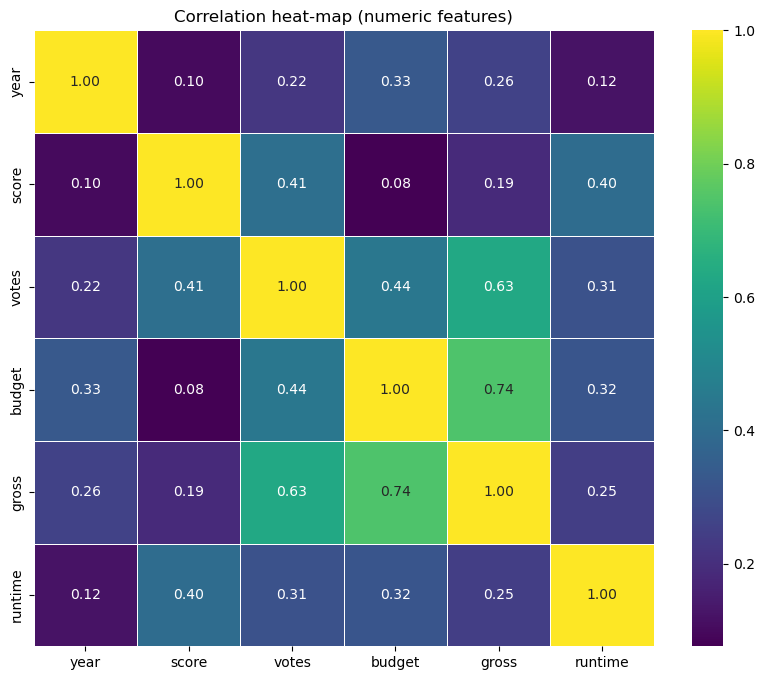

In [13]:

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, fmt='.2f',
            cmap='viridis', linewidths=0.5)
plt.title('Correlation heat‑map (numeric features)')
plt.show()


In [15]:

# 🏷️ Encode categoricals → numeric for mixed correlation
df_encoded = df.apply(lambda col: col.factorize()[0] if col.dtype == 'object' else col)
corr_enc = df_encoded.corr()

# Pairs & strong relations
corr_pairs = corr_enc.unstack()
sorted_pairs = corr_pairs.sort_values(kind='quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print('Strong correlations (|r| > 0.5) including categoricals:')
display(strong_pairs.drop_duplicates().round(2))


Strong correlations (|r| > 0.5) including categoricals:


company   star        0.53
writer    company     0.55
company   director    0.55
name      company     0.59
year      company     0.60
company   released    0.61
gross     votes       0.63
writer    star        0.68
director  star        0.68
star      name        0.73
budget    gross       0.74
director  name        0.75
writer    director    0.75
star      released    0.75
          year        0.76
year      director    0.77
released  director    0.77
writer    name        0.81
          released    0.82
          year        0.82
released  name        0.96
name      year        0.97
released  year        0.99
name      name        1.00
dtype: float64